# IMPORT LIBRARIES

In [1]:
#IMPORT REQUIRED LIBRARIES 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# READ DATA 

In [2]:
#READING THE DATA 

german_data = pd.read_csv("german_data.txt",delim_whitespace = True,header=None)

In [3]:
#HEAD OF THE DATA

german_data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


# PREPROCESSING

In [4]:
#COLUMN NAMES FROM THE DATA DESCRIPTION

columns = ['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
         'saving_acc', 'present_emp_since', 'inst_rate', 'personal_status',
         'other_debtors', 'residing_since', 'property', 'age',
         'inst_plans', 'housing', 'num_credits',
         'job', 'dependents', 'telephone', 'foreign_worker', 'status']

In [5]:
german_data.columns = columns

In [6]:
german_data.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [7]:
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checkin_acc          1000 non-null object
duration             1000 non-null int64
credit_history       1000 non-null object
purpose              1000 non-null object
amount               1000 non-null int64
saving_acc           1000 non-null object
present_emp_since    1000 non-null object
inst_rate            1000 non-null int64
personal_status      1000 non-null object
other_debtors        1000 non-null object
residing_since       1000 non-null int64
property             1000 non-null object
age                  1000 non-null int64
inst_plans           1000 non-null object
housing              1000 non-null object
num_credits          1000 non-null int64
job                  1000 non-null object
dependents           1000 non-null int64
telephone            1000 non-null object
foreign_worker       1000 non-null object
status               1000 non-null int64
dtypes: int64(8), ob

In [8]:
#MAPPING THE OBJECT TYPES WITH VALUES EASY TO UNDERSTAND 


german_data["checkin_acc"] = german_data["checkin_acc"].map({"A11":"negative","A12":"little","A13":"moderate","A14":"no account"})

german_data["credit_history"] = german_data["credit_history"].map({"A30":"no credit history","A31":"all credit paid at bank","A32":"existing credits paid","A34":"credits due"})

german_data["purpose"] = german_data["purpose"].map({"A40":"car(new)","A41":"car(used)","A42":"furniture/equipment","A43":"radio/television","A44":"domestic appliances","A45":"repairs","A46":"education","A47":"vacation - does not exist?","A48":"retraining","A49":"business","A410":"others"})

german_data["saving_acc"] = german_data["saving_acc"].map({"A61":"little","A62":"moderate","A63":"rich","A64":"very rich","A65":"no account"})

german_data["present_emp_since"] = german_data["present_emp_since"].map({"A71":"unemployed","A72":"less than 1","A73":"1-4 years","A74":"4-7 years","A75":"more than 7"})

german_data["personal_status"] = german_data["personal_status"].map({"A91":"male:divorced/seperated","A92":"female:divorced/seperated/widowed","A93":"male:single","A94":"male:married/widowed","A95":"female:single"})

german_data["other_debtors"] = german_data["other_debtors"].map({"A101":"none","A102":"co-applicant","A103":"guarantor"})

german_data["property"] = german_data["property"].map({"A121":"real estate","A122":"building society/life insurance","A123":"car or not","A124":"no property"})

german_data["inst_plans"] = german_data["inst_plans"].map({"A141":"bank","A142":"stores","A143":"none"})

german_data["housing"] = german_data["housing"].map({"A151":"rent","A152":"own","A153":"for free"})

german_data["job"] = german_data["job"].map({"A171":"unemployed/unskilled-NR","A172":"unskilled-R","A173":"skilled/official","A174":"Highly skilled/management"})

german_data["telephone"] = german_data["telephone"].map({"A191":"no","A192":"yes"})

german_data["foreign_worker"] = german_data["foreign_worker"].map({"A201":"yes","A202":"no"})

In [9]:
german_data.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,negative,6,credits due,radio/television,1169,no account,more than 7,4,male:single,none,...,real estate,67,none,own,2,skilled/official,1,yes,yes,1
1,little,48,existing credits paid,radio/television,5951,little,1-4 years,2,female:divorced/seperated/widowed,none,...,real estate,22,none,own,1,skilled/official,1,no,yes,2
2,no account,12,credits due,education,2096,little,4-7 years,2,male:single,none,...,real estate,49,none,own,1,unskilled-R,2,no,yes,1
3,negative,42,existing credits paid,furniture/equipment,7882,little,4-7 years,2,male:single,guarantor,...,building society/life insurance,45,none,for free,1,skilled/official,2,no,yes,1
4,negative,24,NaN,car(new),4870,little,1-4 years,3,male:single,none,...,no property,53,none,for free,2,skilled/official,2,no,yes,2


In [10]:
#BRINGING THE STATUS INTO 0 AND 1.

german_data.status = german_data.status-1

In [11]:
#SUMMARY STATISTICS OF THE NUMERICAL FEATURES

german_data.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [12]:
#SUMMARY STATISTICS OF OBJECT DATATYPE

german_data.describe(include='O')

,checkin_acc,credit_history,purpose,saving_acc,present_emp_since,personal_status,other_debtors,property,inst_plans,housing,job,telephone,foreign_worker
count,1000,912,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,4,10,5,5,4,3,4,3,3,4,2,2
top,no account,existing credits paid,radio/television,little,1-4 years,male:single,none,car or not,none,own,skilled/official,no,yes
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


In [13]:
#CHECK FOR NULL VALUES

german_data.isna().sum()

checkin_acc           0
duration              0
credit_history       88
purpose               0
amount                0
saving_acc            0
present_emp_since     0
inst_rate             0
personal_status       0
other_debtors         0
residing_since        0
property              0
age                   0
inst_plans            0
housing               0
num_credits           0
job                   0
dependents            0
telephone             0
foreign_worker        0
status                0
dtype: int64

IMPUTATION 

In [14]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [15]:
german_data = DataFrameImputer().fit_transform(german_data)

In [16]:
german_data.credit_history.fillna

<bound method Series.fillna of 0                  credits due
1        existing credits paid
2                  credits due
3        existing credits paid
4        existing credits paid
5        existing credits paid
6        existing credits paid
7        existing credits paid
8        existing credits paid
9                  credits due
10       existing credits paid
11       existing credits paid
12       existing credits paid
13                 credits due
14       existing credits paid
15       existing credits paid
16                 credits due
17           no credit history
18       existing credits paid
19       existing credits paid
20                 credits due
21       existing credits paid
22                 credits due
23                 credits due
24                 credits due
25       existing credits paid
26           no credit history
27     all credit paid at bank
28       existing credits paid
29       existing credits paid
                ...           
970     

In [17]:
german_data.isna().sum()

checkin_acc          0
duration             0
credit_history       0
purpose              0
amount               0
saving_acc           0
present_emp_since    0
inst_rate            0
personal_status      0
other_debtors        0
residing_since       0
property             0
age                  0
inst_plans           0
housing              0
num_credits          0
job                  0
dependents           0
telephone            0
foreign_worker       0
status               0
dtype: int64

In [18]:
#CHECK FOR DUPLICATED ROWS

german_data.duplicated().sum()

0

# DATA VISUALISATION

Text(1,0.5,'Most of the applicants in the dataset have no savings account')

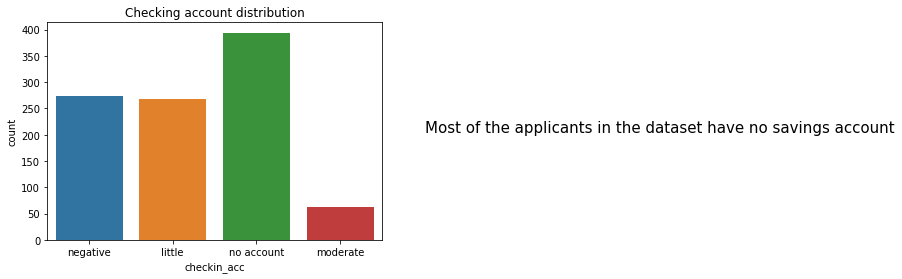

In [19]:
sns.countplot(german_data.checkin_acc)
plt.title("Checking account distribution")
plt.figtext(1,0.5,"Most of the applicants in the dataset have no savings account",fontsize = 15)

Text(1,0.5,'Most of the applicants in the dataset have paid their existing credit')

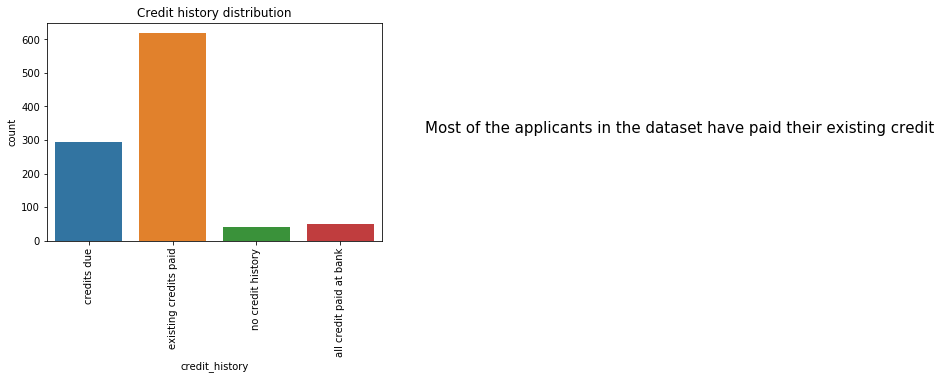

In [20]:
sns.countplot(german_data.credit_history)
plt.xticks(rotation = "vertical")
plt.title("Credit history distribution")
plt.figtext(1,0.5,"Most of the applicants in the dataset have paid their existing credit",fontsize = 15)

Text(0.1,-0.4,"Most of the applicants in the dataset have applied for the credit for the purpose of buying 'radio/television',followed by car(new)")

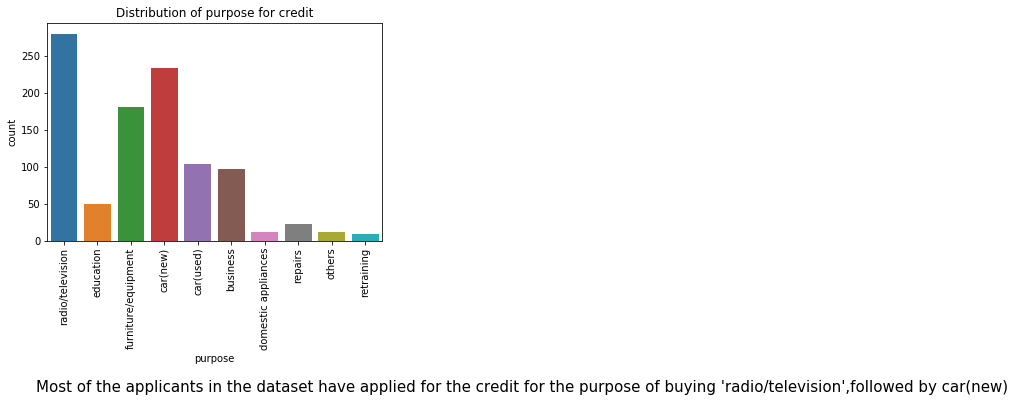

In [21]:
sns.countplot(german_data.purpose)
plt.xticks(rotation='vertical')
plt.title("Distribution of purpose for credit")
plt.figtext(0.1,-0.4,"Most of the applicants in the dataset have applied for the credit for the purpose of buying 'radio/television',followed by car(new)",horizontalalignment = 'left',fontsize = 15)

Text(1,0.5,'Most of the applicants in the dataset have little money in their savings account')

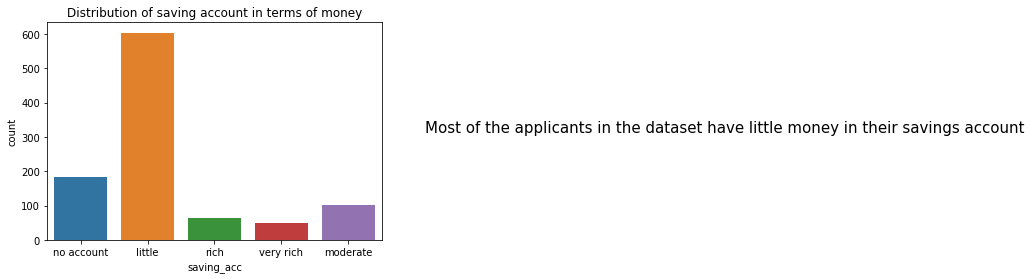

In [22]:
sns.countplot(german_data.saving_acc)
plt.title("Distribution of saving account in terms of money")
plt.figtext(1,0.5,"Most of the applicants in the dataset have little money in their savings account",fontsize = 15)

Text(1,0.5,'Most of the applicants in the dataset have been employed between 1-4 years')

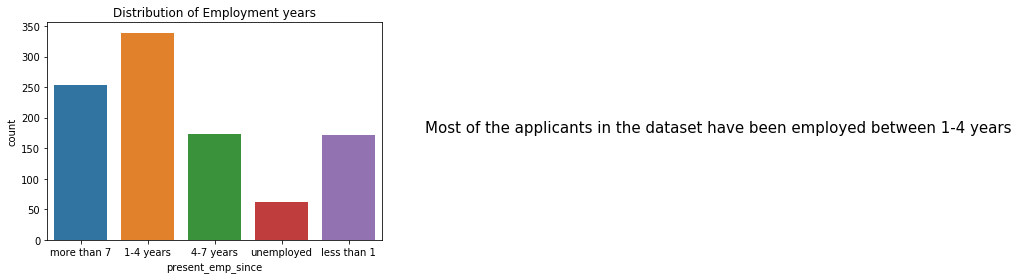

In [23]:
sns.countplot(german_data.present_emp_since)
plt.title("Distribution of Employment years")
plt.figtext(1,0.5,"Most of the applicants in the dataset have been employed between 1-4 years",fontsize = 15)

Text(1,0.5,'Most of the applicants in the dataset are male:single')

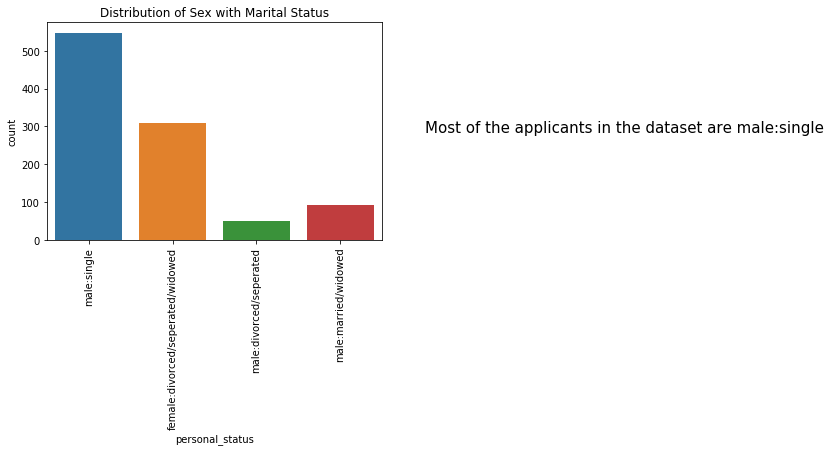

In [24]:
sns.countplot(german_data.personal_status)
plt.xticks(rotation='vertical')
plt.title("Distribution of Sex with Marital Status")
plt.figtext(1,0.5,"Most of the applicants in the dataset are male:single",fontsize = 15)

Text(0,-0.05,'Most of the applicants in the dataset have applied for the credit with no co-applicant or guarantor')

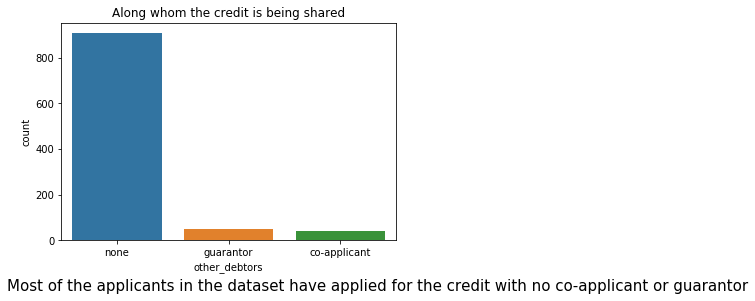

In [25]:
sns.countplot(german_data.other_debtors)
plt.title("Along whom the credit is being shared")
plt.figtext(0,-0.05,"Most of the applicants in the dataset have applied for the credit with no co-applicant or guarantor",fontsize = 15)

Text(1,0.5,"This plot isn't giving any majority inference from the dataset")

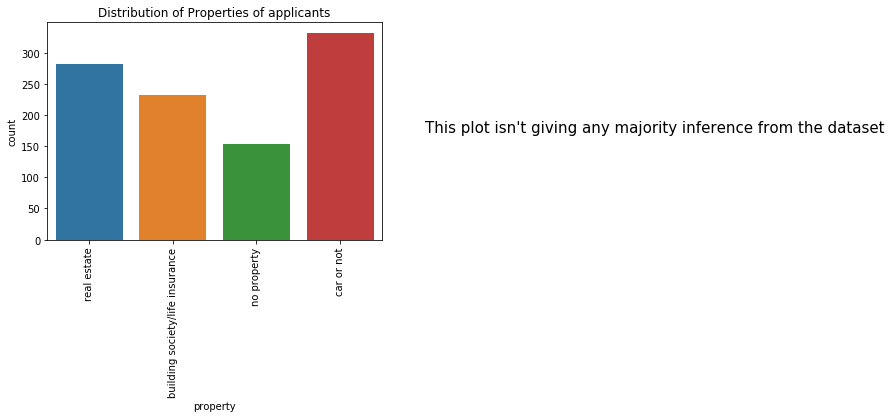

In [26]:
sns.countplot(german_data.property)
plt.xticks(rotation = 'vertical')
plt.title("Distribution of Properties of applicants")
plt.figtext(1,0.5,"This plot isn't giving any majority inference from the dataset",fontsize = 15)


Text(1,0.5,'Most of the applicants in the dataset have no installment plans')

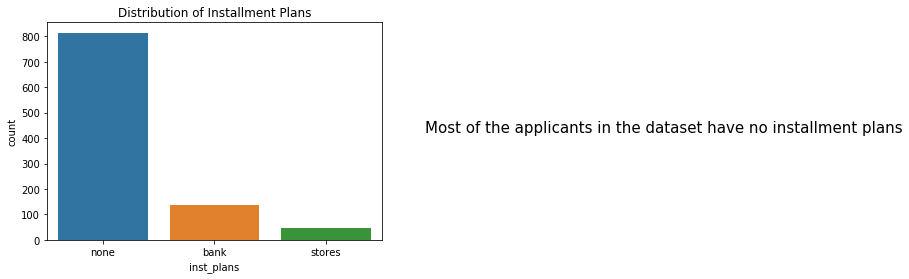

In [27]:
sns.countplot(german_data.inst_plans)
plt.title("Distribution of Installment Plans")
plt.figtext(1,0.5,"Most of the applicants in the dataset have no installment plans",fontsize = 15)

Text(1,0.5,'Most of the applicants in the dataset have their own house')

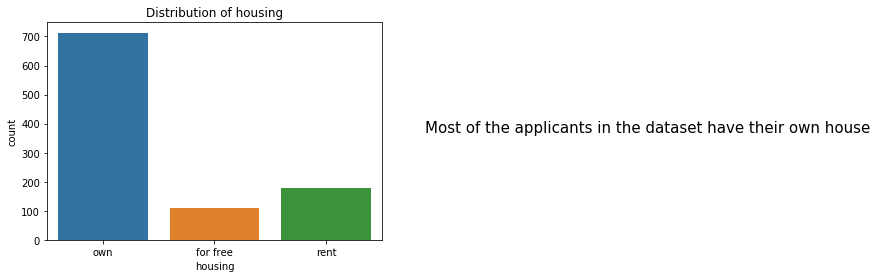

In [28]:
sns.countplot(german_data.housing)
plt.title("Distribution of housing")
plt.figtext(1,0.5,"Most of the applicants in the dataset have their own house",fontsize = 15)

Text(1,0.5,'Most of the applicants in the dataset are skilled/official in nature')

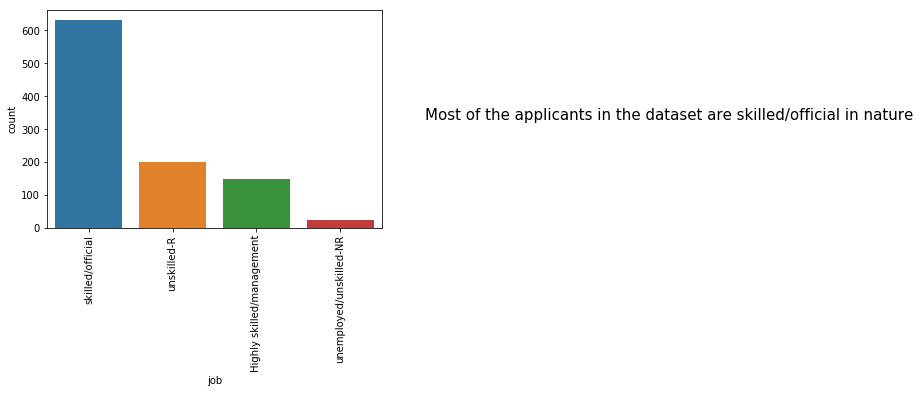

In [29]:
sns.countplot(german_data.job)
plt.xticks(rotation='vertical')
plt.figtext(1,0.5,"Most of the applicants in the dataset are skilled/official in nature",fontsize = 15)

Text(1,0.5,'Most of the applicants in the dataset have no telephone under their names')

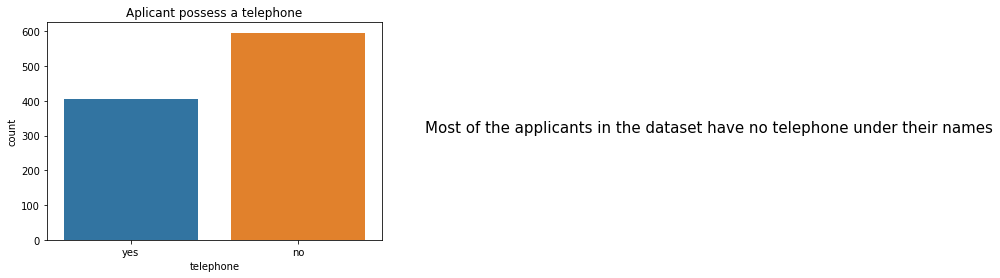

In [30]:
sns.countplot(german_data.telephone)
plt.title("Aplicant possess a telephone")
plt.figtext(1,0.5,"Most of the applicants in the dataset have no telephone under their names",fontsize = 15)

Text(1,0.5,'Most of the applicants in the dataset are foreign workers')

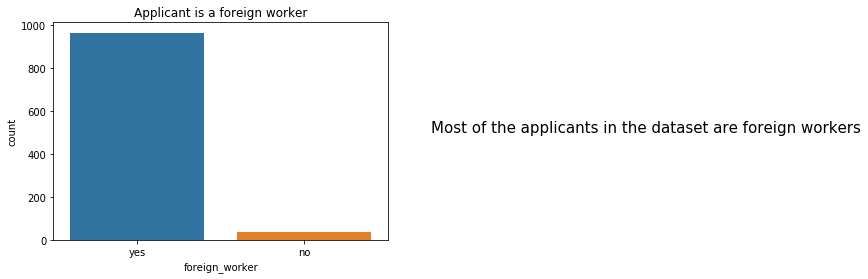

In [31]:
sns.countplot(german_data.foreign_worker)
plt.title("Applicant is a foreign worker")
plt.figtext(1,0.5,"Most of the applicants in the dataset are foreign workers",fontsize = 15)

Text(1,0.5,'Most of the applicants in the dataset are good credit')

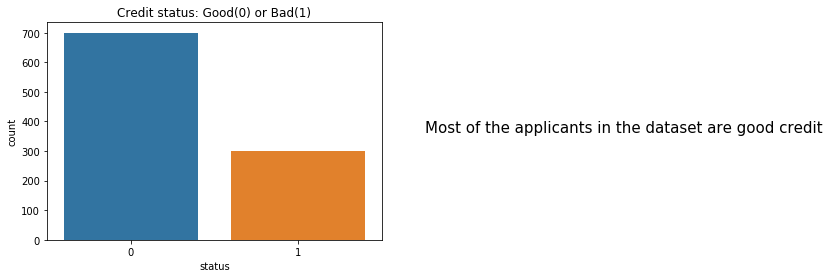

In [32]:
sns.countplot(german_data.status)
plt.title("Credit status: Good(0) or Bad(1)")
plt.figtext(1,0.5,"Most of the applicants in the dataset are good credit",fontsize = 15)

In [33]:
german_data.amount.describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: amount, dtype: float64

C:\Users\suraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(1,0.4,'Mean amount given:3271 \nMax amount given:18424 \nMin amount given:250')

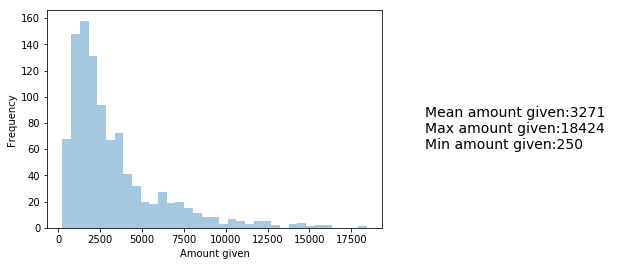

In [34]:
sns.distplot(german_data.amount,kde=False)
plt.xlabel("Amount given")
plt.ylabel("Frequency")
plt.figtext(1,0.4,'''Mean amount given:3271 
Max amount given:18424 
Min amount given:250''',fontsize = 14)


In [35]:
german_data.duration.describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: duration, dtype: float64

C:\Users\suraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(1,0.4,'Mean duration:21\nMin duration:4\nMax duration:72')

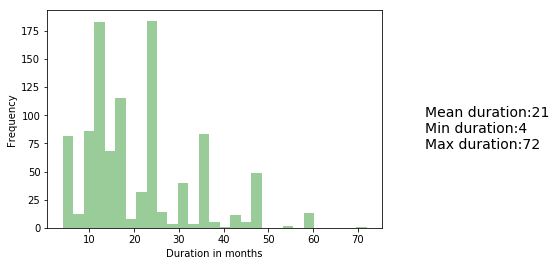

In [36]:
sns.distplot(german_data.duration,kde=False,color = "green")
plt.xlabel("Duration in months")
plt.ylabel("Frequency")
plt.figtext(1,0.4,'''Mean duration:21
Min duration:4
Max duration:72''',fontsize = 14)

In [37]:
german_data.inst_rate.describe()

count    1000.000000
mean        2.973000
std         1.118715
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: inst_rate, dtype: float64

C:\Users\suraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(1,0.4,'Mean interest rate:2.98\nMin interest rate:1\nMax interest rate:4\nMajority have an interest rate of 4')

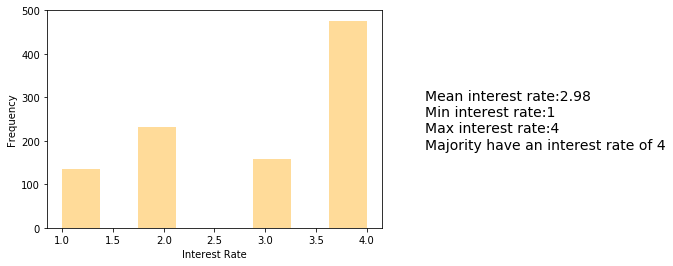

In [38]:
sns.distplot(german_data.inst_rate,kde=False,color='orange')
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
plt.figtext(1,0.4,'''Mean interest rate:2.98
Min interest rate:1
Max interest rate:4
Majority have an interest rate of 4''',fontsize = 14)

In [39]:
german_data.age.describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

C:\Users\suraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(1,0.4,'Mean age:35.5\nMin age:19\nMax age:75')

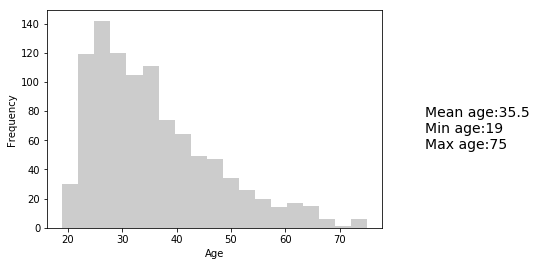

In [40]:
sns.distplot(german_data.age,kde=False,color='grey')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.figtext(1,0.4,'''Mean age:35.5
Min age:19
Max age:75''',fontsize = 14)

In [41]:
german_data.num_credits.describe()

count    1000.000000
mean        1.407000
std         0.577654
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: num_credits, dtype: float64

Text(1,0.4,'Mean number of credits:1.40\nMin number of credits:1\nMax number of credits:4\nMajority of the applicants have 1 credit with them')

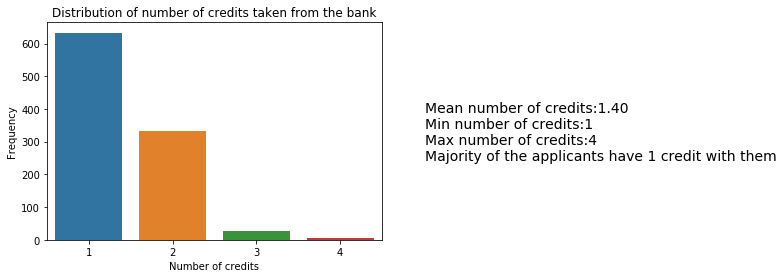

In [42]:
sns.countplot(german_data.num_credits)
plt.xlabel("Number of credits")
plt.ylabel("Frequency")
plt.title("Distribution of number of credits taken from the bank")
plt.figtext(1,0.4,'''Mean number of credits:1.40
Min number of credits:1
Max number of credits:4
Majority of the applicants have 1 credit with them''',fontsize = 14)

Text(0,0,'The middle 50% of the population lies between 1300 to 3900')

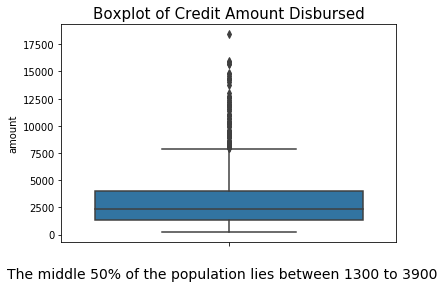

In [43]:
sns.boxplot(german_data.amount, orient = 'v' )
plt.title( "Boxplot of Credit Amount Disbursed", fontsize = 15)
plt.figtext(0,0,"The middle 50% of the population lies between 1300 to 3900",fontsize=14)

Text(0.5,1,'Boxplot of Credit Amount Disbursed by Credit Status')

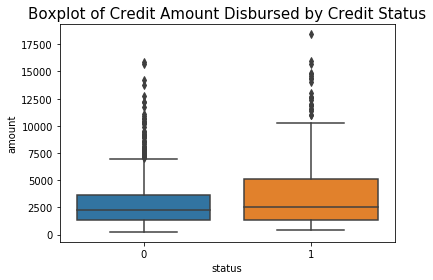

In [44]:
sns.boxplot( x = 'status', y = 'amount', data = german_data, orient = 'v' )
plt.title( "Boxplot of Credit Amount Disbursed by Credit Status", fontsize = 15)

Text(0,-0.05,'Shows higher amounts are being defaulted')

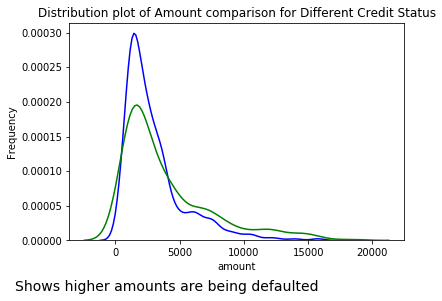

In [45]:
sns.distplot(german_data[german_data.status == 0].amount, color = 'b', hist = False )
sns.distplot(german_data[german_data.status == 1].amount, color = 'g', hist = False )
plt.title("Distribution plot of Amount comparison for Different Credit Status" )
plt.ylabel("Frequency")
plt.figtext(0,-0.05,"Shows higher amounts are being defaulted",horizontalalignment='left',fontsize = 14)

C:\Users\suraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\suraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


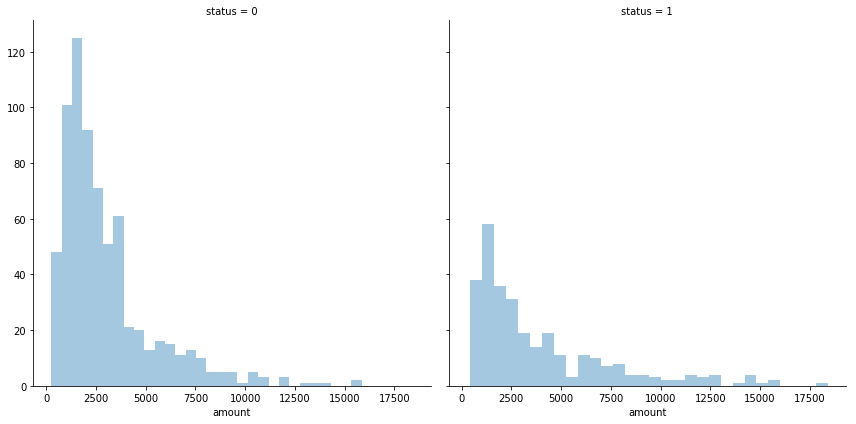

In [46]:
a = sns.FacetGrid(german_data, col="status", size = 6)
a.map(sns.distplot, "amount", kde = False, bins = 30)

Text(0,-0.05,'Shows interest rate of 1 has higher default')

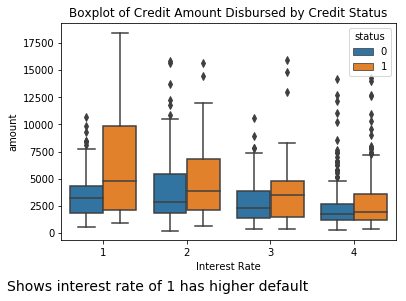

In [47]:
sns.boxplot( x = 'inst_rate', y = 'amount', hue = 'status', data = german_data, orient = 'v' )
plt.title( "Boxplot of Credit Amount Disbursed by Credit Status")
plt.xlabel("Interest Rate")
plt.figtext(0,-0.05,"Shows interest rate of 1 has higher default",fontsize=14)

Text(0,-0.1,'Customer with no checking account are defaulting\nand customers having checking account with little balance are high defaulters')

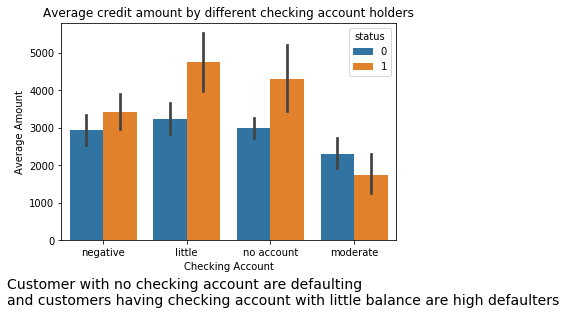

In [48]:
sns.barplot( x = 'checkin_acc', y = 'amount', hue = 'status', data = german_data)
plt.xlabel("Checking Account")
plt.ylabel("Average Amount")
plt.title( "Average credit amount by different checking account holders")
plt.figtext(0,-0.10,'''Customer with no checking account are defaulting
and customers having checking account with little balance are high defaulters''',fontsize=14)

Text(0,-0.1,'Higher amount for less duration are being defaulted')

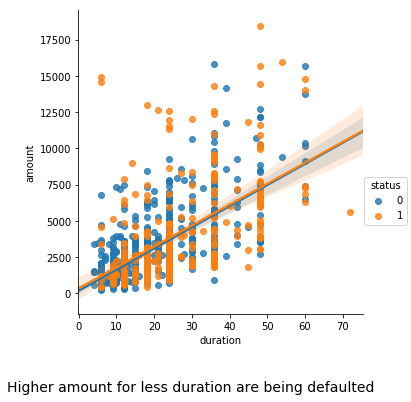

In [49]:
sns.lmplot(x='duration',y='amount',hue='status',data = german_data )
plt.figtext(0,-0.1,'''Higher amount for less duration are being defaulted''',fontsize=14)

In [50]:
german_data.dependents.unique()

array([1, 2], dtype=int64)

Text(0,-0.1,'Customers with 1 dependent are at risk of default')

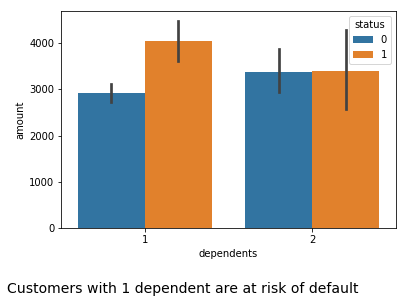

In [51]:
sns.barplot(x='dependents',y='amount',hue='status',data = german_data )
plt.figtext(0,-0.1,'''Customers with 1 dependent are at risk of default''',fontsize=14)

Text(0,-0.1,'Customers who are very rich are defaulting at high amount')

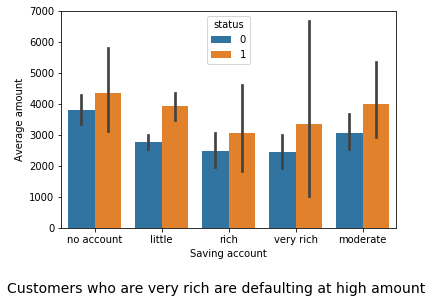

In [52]:
sns.barplot(x='saving_acc',y='amount',hue='status',data = german_data )
plt.ylabel("Average amount")
plt.xlabel("Saving account")
plt.figtext(0,-0.1,'''Customers who are very rich are defaulting at high amount''',fontsize=14)

Text(0,-0.15,'Customers who are unemployed are defaulting\nalmost as equal as employed customers more than 7 years with higher amount')

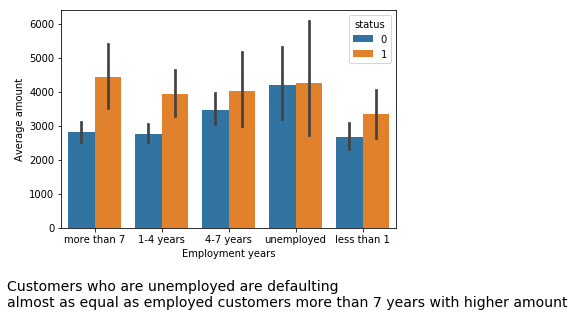

In [53]:
sns.barplot(x='present_emp_since',y='amount',hue='status',data = german_data )
plt.ylabel("Average amount")
plt.xlabel("Employment years")
plt.figtext(0,-0.15,'''Customers who are unemployed are defaulting
almost as equal as employed customers more than 7 years with higher amount''',fontsize=14)

Text(0,-0.55,'Customers who have no properties are defaulting with high mean amount')

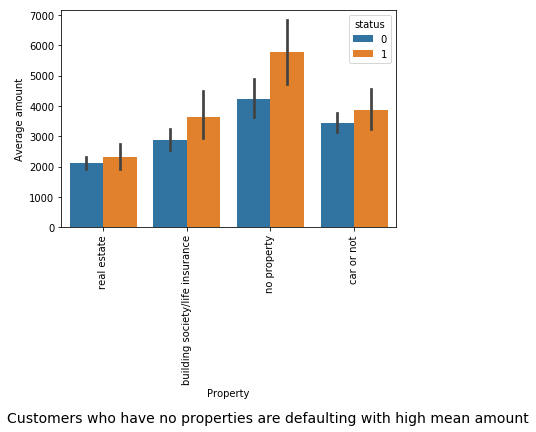

In [54]:
sns.barplot(x='property',y='amount',hue='status',data = german_data )
plt.xticks(rotation='vertical')
plt.ylabel("Average amount")
plt.xlabel("Property")
plt.figtext(0,-0.55,'''Customers who have no properties are defaulting with high mean amount''',fontsize=14)

Text(0,-0.1,'Customers who are not foreign worker are defaulting with high mean amount')

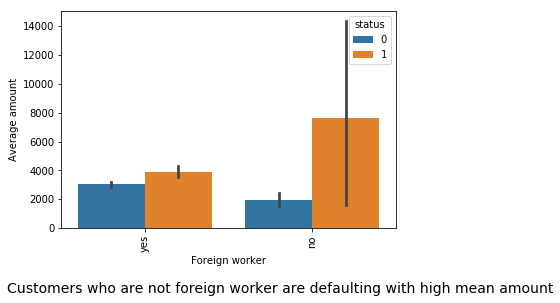

In [55]:
sns.barplot(x='foreign_worker',y='amount',hue='status',data = german_data )
plt.xticks(rotation='vertical')
plt.ylabel("Average amount")
plt.xlabel("Foreign worker")
plt.figtext(0,-0.1,'''Customers who are not foreign worker are defaulting with high mean amount''',fontsize=14)

# FEATURE SELECTION THROUGH CORRELATION 

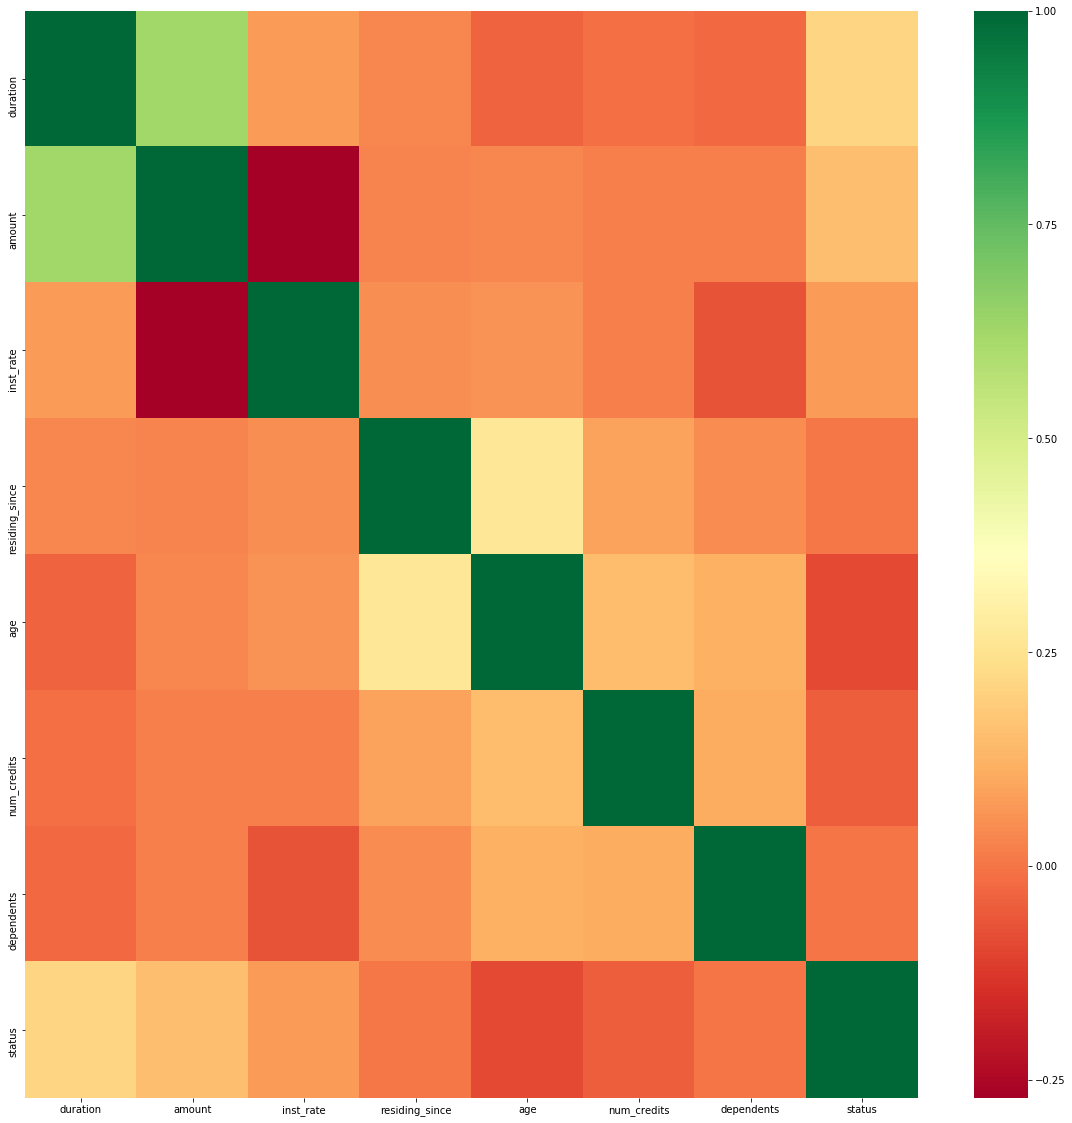

In [56]:
corr = german_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap="RdYlGn")

In [57]:
def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''

    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if abs(val) >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]

    # Drops the correlated columns
    for i in drops:
        col = x.iloc[:, (i+1):(i+2)].columns.values
        x = x.drop(col, axis=1)
    return x

In [58]:
corr_df(german_data,corr_val=0.9)

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,negative,6,credits due,radio/television,1169,no account,more than 7,4,male:single,none,...,real estate,67,none,own,2,skilled/official,1,yes,yes,0
1,little,48,existing credits paid,radio/television,5951,little,1-4 years,2,female:divorced/seperated/widowed,none,...,real estate,22,none,own,1,skilled/official,1,no,yes,1
2,no account,12,credits due,education,2096,little,4-7 years,2,male:single,none,...,real estate,49,none,own,1,unskilled-R,2,no,yes,0
3,negative,42,existing credits paid,furniture/equipment,7882,little,4-7 years,2,male:single,guarantor,...,building society/life insurance,45,none,for free,1,skilled/official,2,no,yes,0
4,negative,24,existing credits paid,car(new),4870,little,1-4 years,3,male:single,none,...,no property,53,none,for free,2,skilled/official,2,no,yes,1
5,no account,36,existing credits paid,education,9055,no account,1-4 years,2,male:single,none,...,no property,35,none,for free,1,unskilled-R,2,yes,yes,0
6,no account,24,existing credits paid,furniture/equipment,2835,rich,more than 7,3,male:single,none,...,building society/life insurance,53,none,own,1,skilled/official,1,no,yes,0
7,little,36,existing credits paid,car(used),6948,little,1-4 years,2,male:single,none,...,car or not,35,none,rent,1,Highly skilled/management,1,yes,yes,0
8,no account,12,existing credits paid,radio/television,3059,very rich,4-7 years,2,male:divorced/seperated,none,...,real estate,61,none,own,1,unskilled-R,1,no,yes,0
9,little,30,credits due,car(new),5234,little,unemployed,4,male:married/widowed,none,...,car or not,28,none,own,2,Highly skilled/management,1,no,yes,1


# FEATURE SELECTION USING CHI SQUARE

In [59]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [60]:
german_data1 = german_data.copy()

In [61]:
cT = ChiSquare(german_data1)

In [62]:
german_data1.dtypes

checkin_acc          object
duration              int64
credit_history       object
purpose              object
amount                int64
saving_acc           object
present_emp_since    object
inst_rate             int64
personal_status      object
other_debtors        object
residing_since        int64
property             object
age                   int64
inst_plans           object
housing              object
num_credits           int64
job                  object
dependents            int64
telephone            object
foreign_worker       object
status                int64
dtype: object

In [63]:
Testcolumns = ["duration","amount","inst_rate","residing_since","age","num_credits","dependents","checkin_acc","credit_history","purpose","saving_acc","present_emp_since","personal_status","other_debtors","property","inst_plans","housing","job","telephone","foreign_worker"]

In [64]:
for var in Testcolumns:
    cT.TestIndependence(colX=var,colY="status" )

duration is IMPORTANT for Prediction
amount is NOT an important predictor. (Discard amount from model)
inst_rate is NOT an important predictor. (Discard inst_rate from model)
residing_since is NOT an important predictor. (Discard residing_since from model)
age is NOT an important predictor. (Discard age from model)
num_credits is NOT an important predictor. (Discard num_credits from model)
dependents is NOT an important predictor. (Discard dependents from model)
checkin_acc is IMPORTANT for Prediction
credit_history is IMPORTANT for Prediction
purpose is IMPORTANT for Prediction
saving_acc is IMPORTANT for Prediction
present_emp_since is IMPORTANT for Prediction
personal_status is IMPORTANT for Prediction
other_debtors is IMPORTANT for Prediction
property is IMPORTANT for Prediction
inst_plans is IMPORTANT for Prediction
housing is IMPORTANT for Prediction
job is NOT an important predictor. (Discard job from model)
telephone is NOT an important predictor. (Discard telephone from model)

In [65]:
german_data1.drop(labels=["amount","inst_rate","residing_since","age","dependents","job","telephone"],axis=1,inplace=True)

In [66]:
y = german_data1.status

In [67]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: status, dtype: int64

In [68]:
x = german_data1.drop(labels="status",axis=1)

In [69]:
x.shape

(1000, 13)

In [70]:
x = pd.get_dummies(x,prefix_sep=" :",drop_first=True)

In [71]:
x.head()

,duration,num_credits,checkin_acc :moderate,checkin_acc :negative,checkin_acc :no account,credit_history :credits due,credit_history :existing credits paid,credit_history :no credit history,purpose :car(new),purpose :car(used),...,other_debtors :guarantor,other_debtors :none,property :car or not,property :no property,property :real estate,inst_plans :none,inst_plans :stores,housing :own,housing :rent,foreign_worker :yes
0,6,2,0,1,0,1,0,0,0,0,...,0,1,0,0,1,1,0,1,0,1
1,48,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,1,0,1
2,12,1,0,0,1,1,0,0,0,0,...,0,1,0,0,1,1,0,1,0,1
3,42,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,24,2,0,1,0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1


# MODEL BUILDING

LOGISTIC REGRESSION 

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr = LogisticRegression(n_jobs=-1)

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix

In [76]:
scaler = StandardScaler()

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [79]:
scaler.fit(X_train.iloc[:,:2])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [80]:
X_train = scaler.transform(X_train.iloc[:,:2])

In [81]:
X_test = scaler.transform(X_test.iloc[:,:2])

In [82]:
# HYPERPARAMETER TUNING 

param_grid = param_grid = {'penalty':['l1','l2'],
             'C':[1,2,3,4,5]}

In [83]:
lr_cv = GridSearchCV(lr,param_grid,cv=5,n_jobs=-1)

In [84]:
lr_cv.fit(X_train,y_train)

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [85]:
print(lr_cv.best_params_,lr_cv.best_score_)

{'C': 1, 'penalty': 'l1'} 0.7085714285714285


In [86]:
lr_best = lr_cv.best_estimator_

In [87]:
lr_pred_train = lr_best.predict(X_train)

In [88]:
lr_pred_test = lr_best.predict(X_test) 

In [89]:
#FOR TRAIN DATA

print(classification_report(y_train,lr_pred_train))

             precision    recall  f1-score   support

          0       0.71      0.96      0.82       486
          1       0.60      0.13      0.21       214

avg / total       0.68      0.71      0.63       700



In [90]:
#FOR TEST DATA

print(classification_report(y_test,lr_pred_test))

             precision    recall  f1-score   support

          0       0.73      0.94      0.82       214
          1       0.45      0.12      0.19        86

avg / total       0.65      0.71      0.64       300



In [91]:
confusion_matrix(y_test,lr_pred_test)

array([[202,  12],
       [ 76,  10]], dtype=int64)

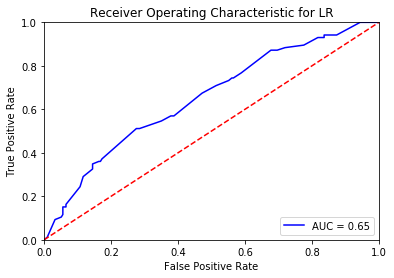

In [92]:
from sklearn import metrics
probs = lr_best.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

DECISION TREE CLASSIFIER

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
dt = DecisionTreeClassifier()

In [95]:
param_grid = {'max_depth': [10, 20, 30, 40],
 'max_features': ['auto', 'sqrt','log2'],}

In [96]:
dt_cv = GridSearchCV(dt,param_grid,cv=5,n_jobs=-1)

In [97]:
dt_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 20, 30, 40], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [98]:
print(dt_cv.best_params_,dt_cv.best_score_)

{'max_depth': 10, 'max_features': 'auto'} 0.6871428571428572


In [99]:
dt_best = dt_cv.best_estimator_

In [100]:
dt_pred_train = dt_best.predict(X_train)

In [101]:
dt_pred_test = dt_best.predict(X_test)

In [102]:
#FOR TRAIN DATA

print(classification_report(y_train,dt_pred_train))

             precision    recall  f1-score   support

          0       0.72      0.97      0.83       486
          1       0.67      0.14      0.23       214

avg / total       0.70      0.72      0.64       700



In [103]:
#FOR TEST DATA

print(classification_report(y_test,dt_pred_test))

             precision    recall  f1-score   support

          0       0.73      0.95      0.83       214
          1       0.52      0.14      0.22        86

avg / total       0.67      0.72      0.65       300



In [104]:
print(confusion_matrix(y_test,dt_pred_test))

[[203  11]
 [ 74  12]]


GRADIENT BOOSTING CLASSIFIER

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

In [106]:
GBC = GradientBoostingClassifier()

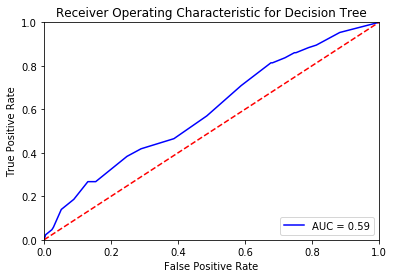

In [107]:
probs = dt_best.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
GBC = GradientBoostingClassifier()

In [110]:
param_grid = {"loss":['deviance', 'exponential'],
              "n_estimators" : [100,150,200,250],
              "learning_rate" : [0.1,0.5,0.9,1]}

In [111]:
GBC_cv = GridSearchCV(GBC,param_grid,cv=5,n_jobs=-1)

In [112]:
GBC_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'loss': ['deviance', 'exponential'], 'n_estimators': [100, 150, 200, 250], 'learning_rate': [0.1, 0.5, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [113]:
print(GBC_cv.best_params_,GBC_cv.best_score_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100} 0.6957142857142857


In [114]:
GBC_best = GBC_cv.best_estimator_

In [115]:
GBC_pred_train = GBC_best.predict(X_train)

In [116]:
GBC_pred_test = GBC_best.predict(X_test)

In [117]:
#FOR TRAIN DATA

print(classification_report(y_train,GBC_pred_train))

             precision    recall  f1-score   support

          0       0.72      0.97      0.82       486
          1       0.66      0.13      0.21       214

avg / total       0.70      0.71      0.64       700



In [118]:
#FOR TEST DATA

print(classification_report(y_test,GBC_pred_test))

             precision    recall  f1-score   support

          0       0.73      0.95      0.82       214
          1       0.48      0.12      0.19        86

avg / total       0.66      0.71      0.64       300



In [119]:
print(confusion_matrix(y_test,GBC_pred_test))

[[203  11]
 [ 76  10]]


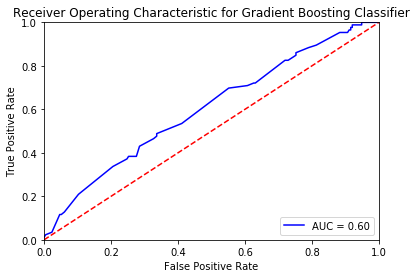

In [120]:
probs = GBC_best.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Gradient Boosting Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

RANDOM FOREST CLASSIFIER

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rfc = RandomForestClassifier()

In [123]:
param_grid = {
 'max_depth': [10, 20, 30, 40, 50,],
 'max_features': ['sqrt','log2'],
 'n_estimators': [100,150,200,250,300]}

In [124]:
rfc_cv = GridSearchCV(rfc,param_grid,cv=5,n_jobs=-1)

In [125]:
rfc_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 20, 30, 40, 50], 'max_features': ['sqrt', 'log2'], 'n_estimators': [100, 150, 200, 250, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [126]:
print(rfc_cv.best_params_,rfc_cv.best_score_)

{'max_depth': 30, 'max_features': 'log2', 'n_estimators': 200} 0.6914285714285714


In [127]:
rfc_best = rfc_cv.best_estimator_

In [128]:
rfc_pred_train = rfc_best.predict(X_train)

In [129]:
rfc_pred_test = rfc_best.predict(X_test)

In [130]:
#FOR TRAIN DATA

print(classification_report(y_train,rfc_pred_train))

             precision    recall  f1-score   support

          0       0.72      0.97      0.83       486
          1       0.67      0.14      0.23       214

avg / total       0.70      0.72      0.64       700



In [131]:
#FOR TEST DATA

print(classification_report(y_test,rfc_pred_test))

             precision    recall  f1-score   support

          0       0.73      0.95      0.83       214
          1       0.50      0.13      0.20        86

avg / total       0.66      0.71      0.65       300



In [132]:
print(confusion_matrix(y_test,rfc_pred_test))

[[203  11]
 [ 75  11]]


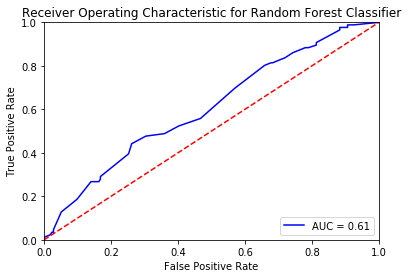

In [133]:
probs = rfc_best.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

XGBOOST CLASSIFIER

In [134]:
from xgboost import XGBClassifier

In [135]:
clf = XGBClassifier()

In [136]:
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [137]:
xgb_pred_train = clf.predict(X_train)

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [138]:
xgb_pred_test = clf.predict(X_test)

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [139]:
#FOR TRAIN

print(classification_report(y_train,xgb_pred_train))

             precision    recall  f1-score   support

          0       0.72      0.96      0.82       486
          1       0.61      0.13      0.22       214

avg / total       0.68      0.71      0.64       700



In [140]:
#FOR TEST

print(classification_report(y_test,xgb_pred_test))

             precision    recall  f1-score   support

          0       0.73      0.94      0.82       214
          1       0.50      0.14      0.22        86

avg / total       0.67      0.71      0.65       300



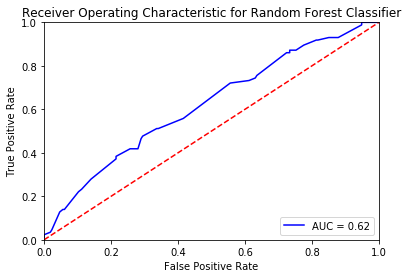

In [141]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [142]:
confusion_matrix(y_test,xgb_pred_test)

array([[202,  12],
       [ 74,  12]], dtype=int64)